In [6]:
import pandas as pd 
import numpy as np 
import ucimlrepo
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [5]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [9]:
df = pd.concat([X, y], axis=1)

In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [21]:
matriz_corr_spearman = df.corr('spearman')

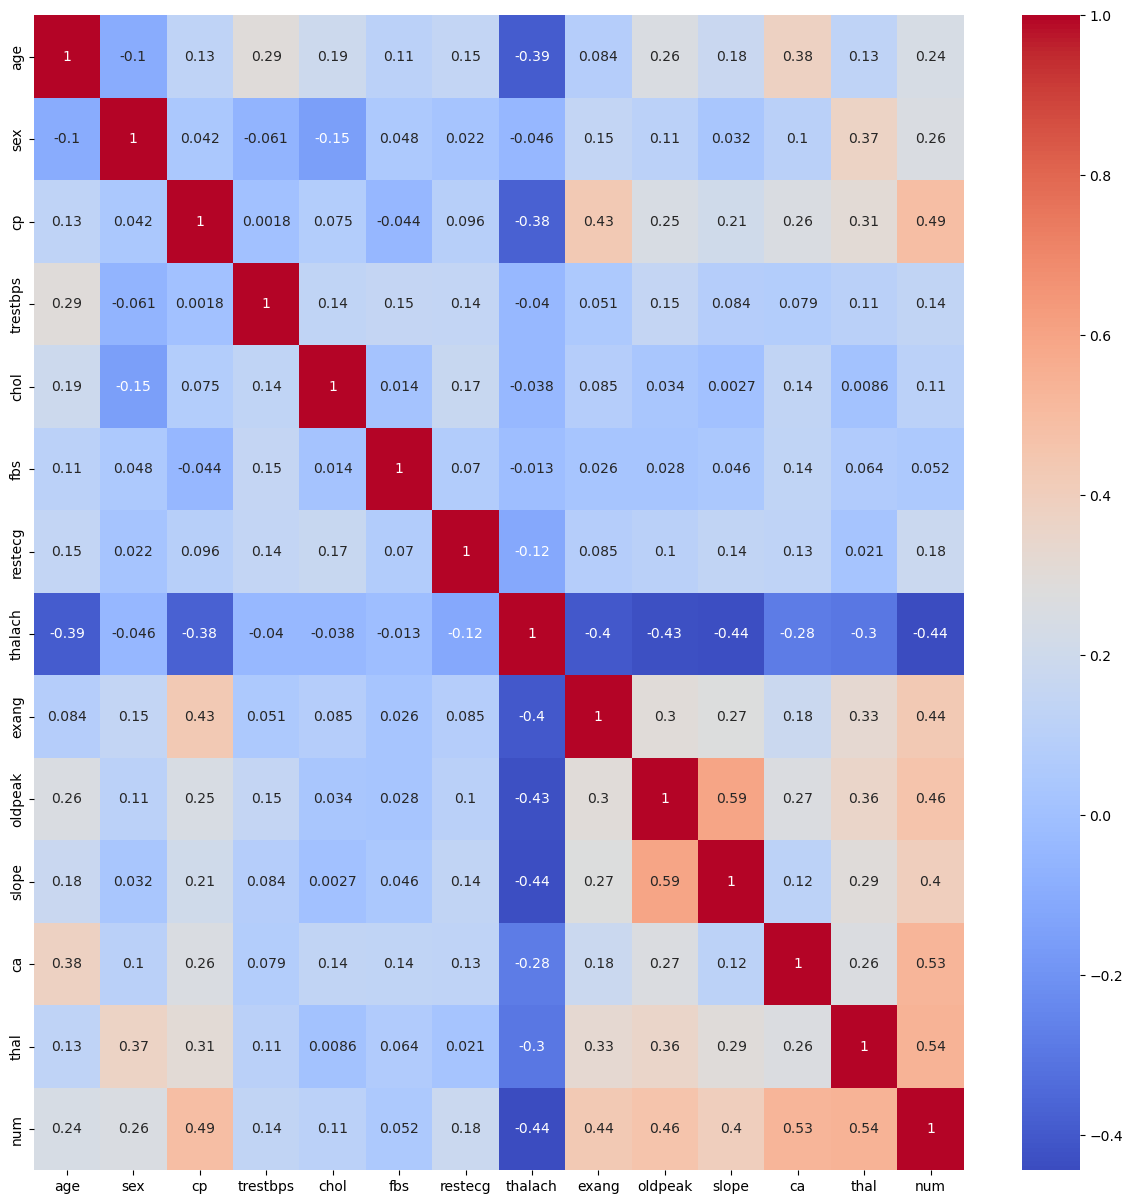

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(matriz_corr_spearman, annot=True, cmap='coolwarm')
plt.show()

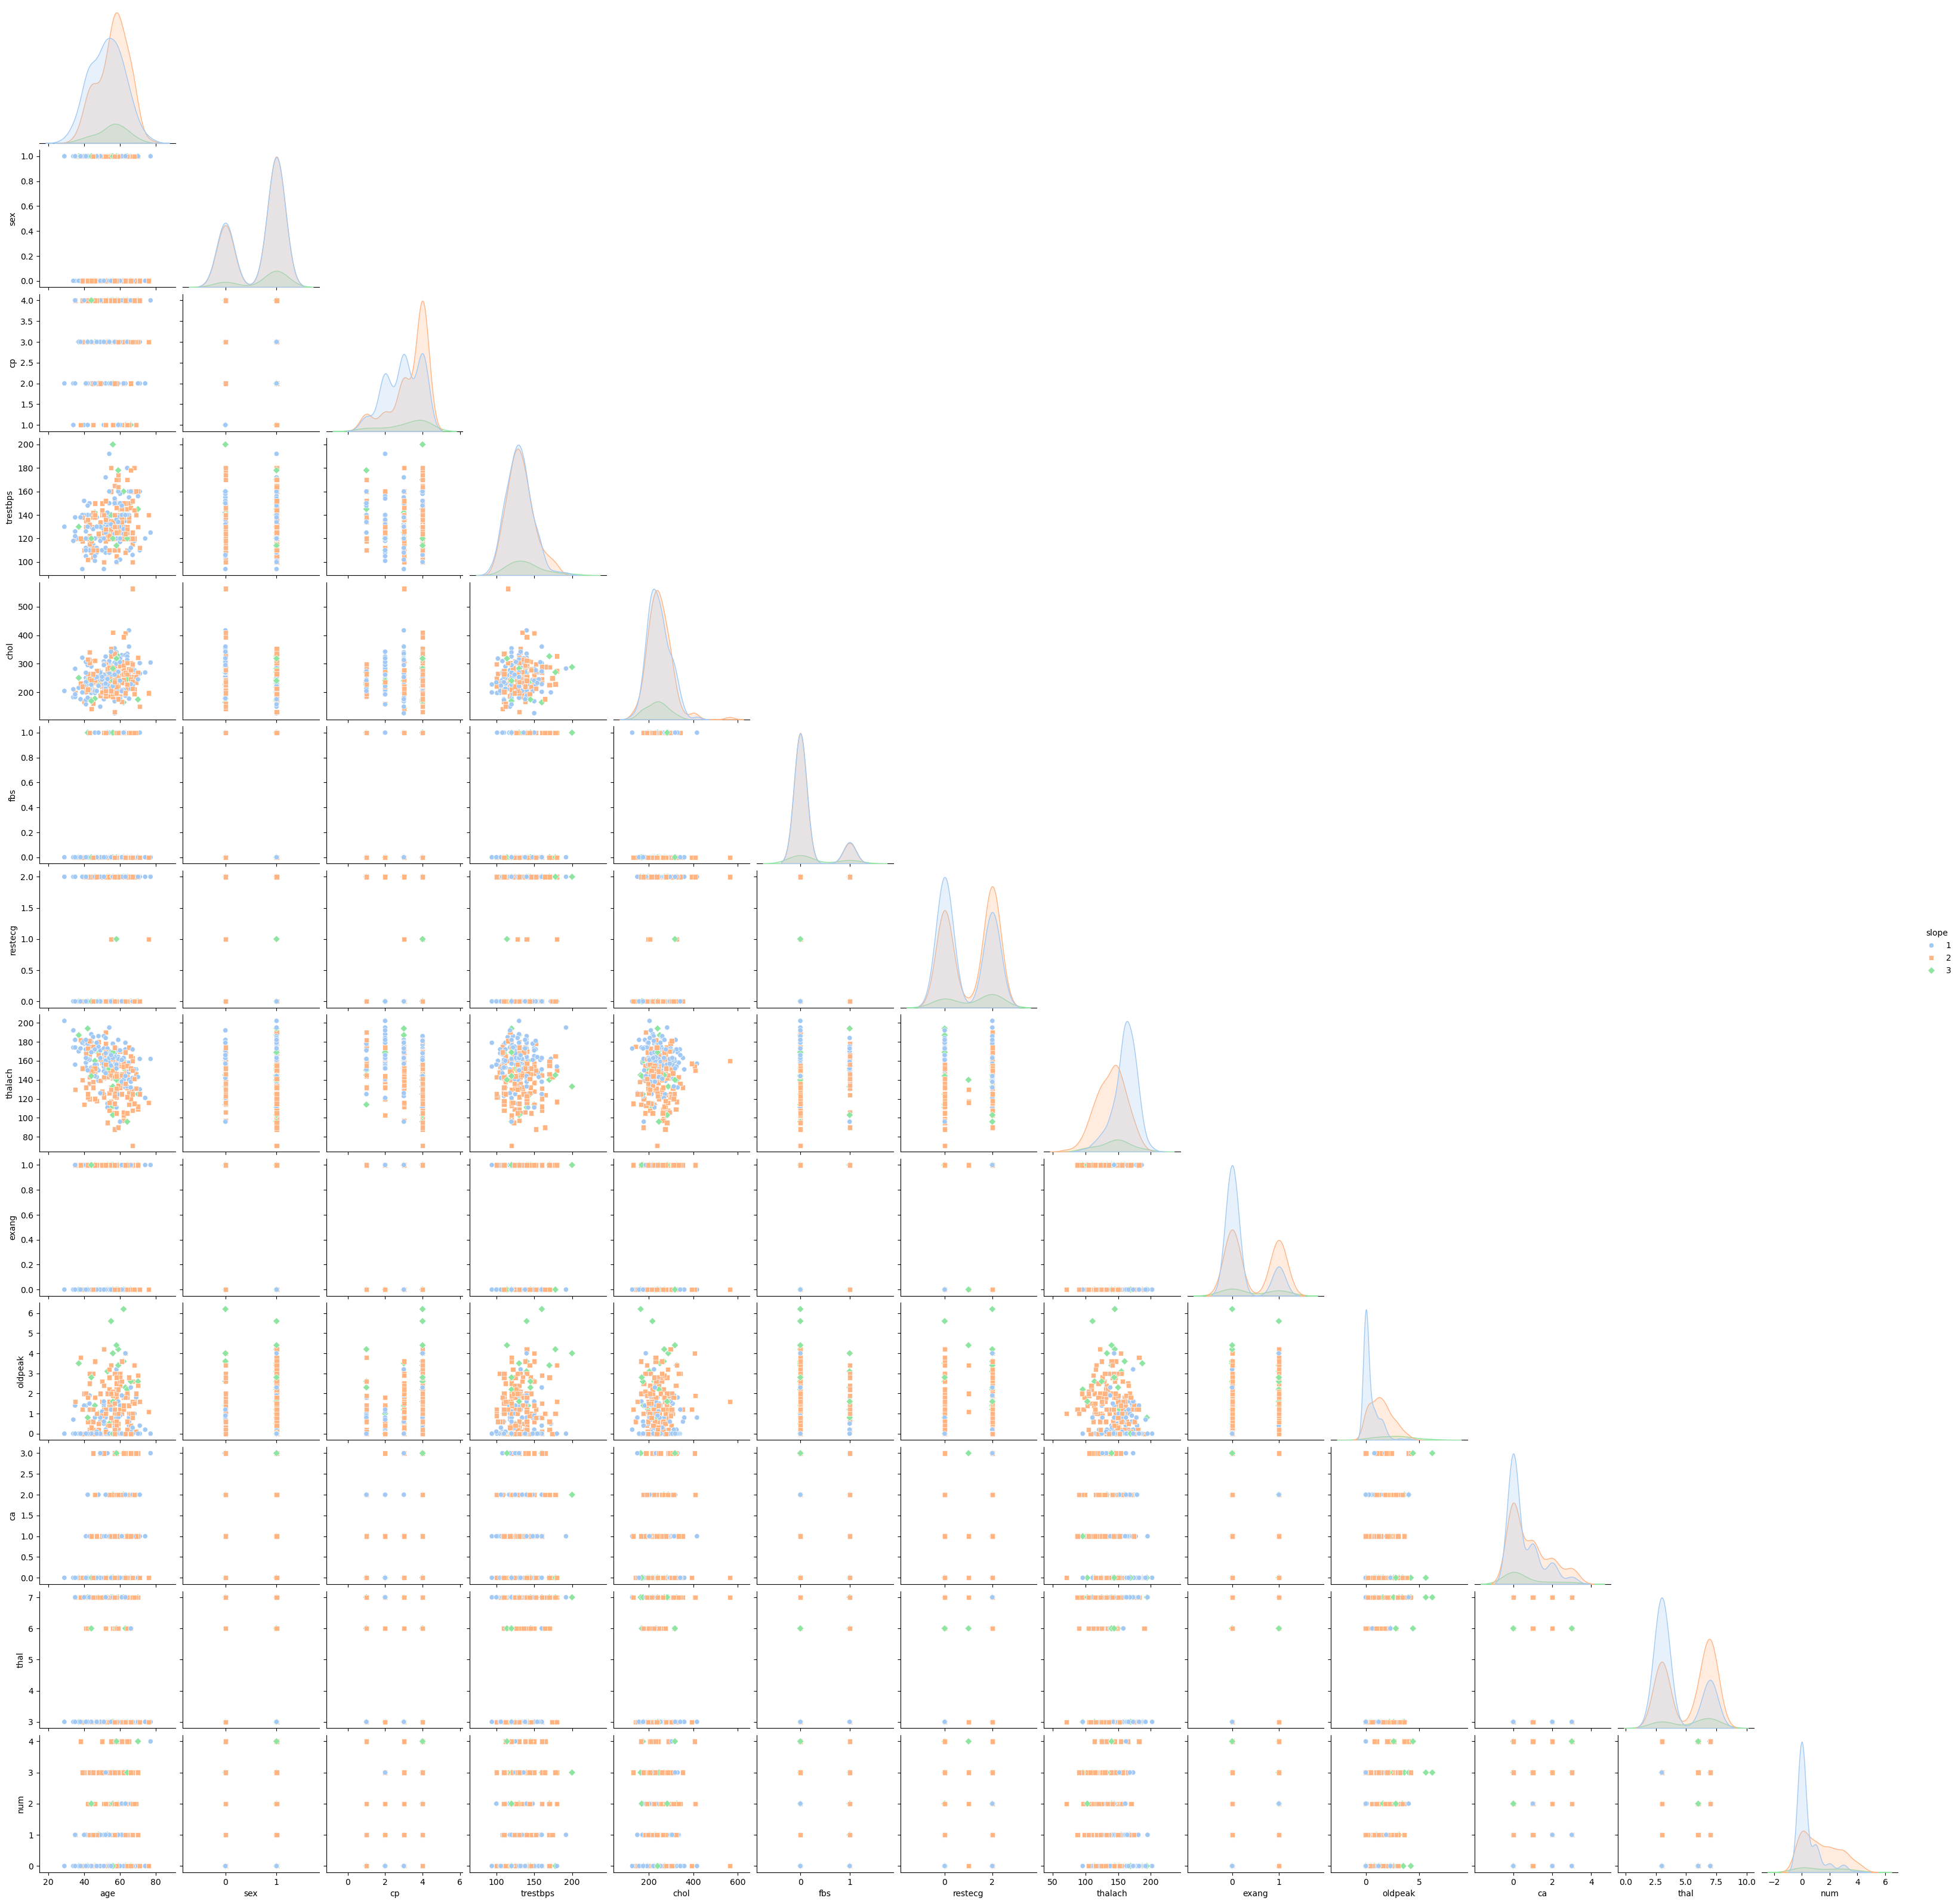

In [37]:
sns.color_palette("Paired")
sns.pairplot(df, corner=True, hue="slope", markers=["o", "s", "D"], palette = 'pastel')

In [40]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

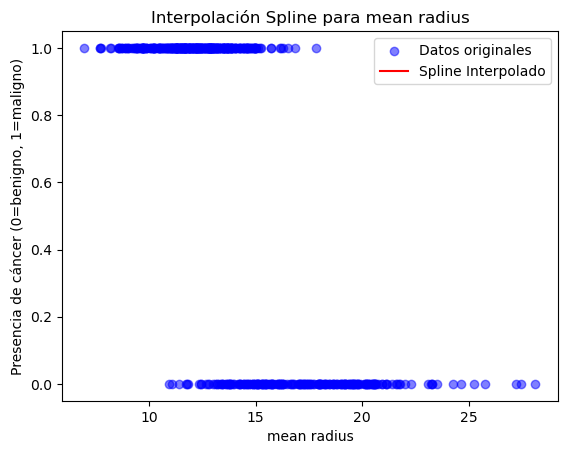

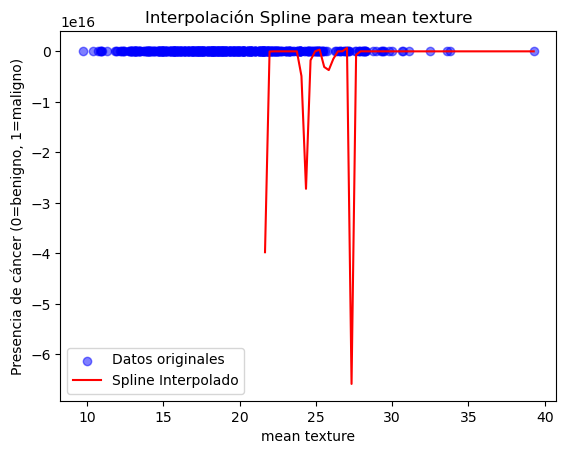

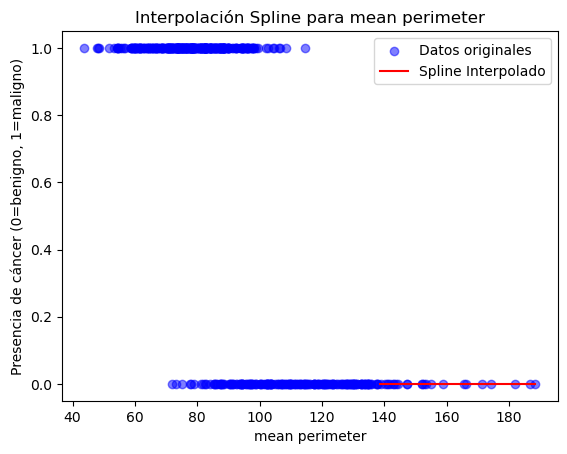

/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_15386/349876889.py:24: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  spline = UnivariateSpline(x_sorted, y_sorted, s=1)  # s es el parámetro de suavizado


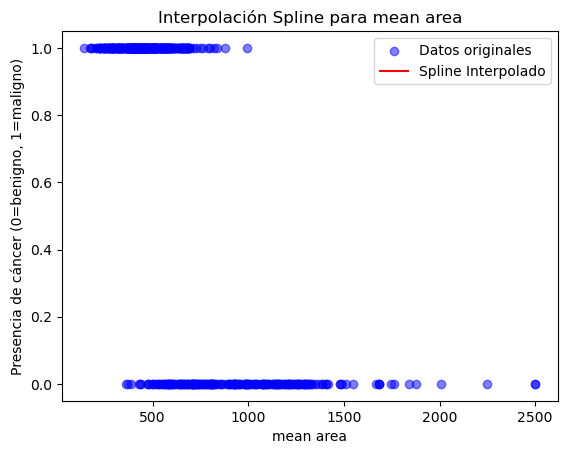

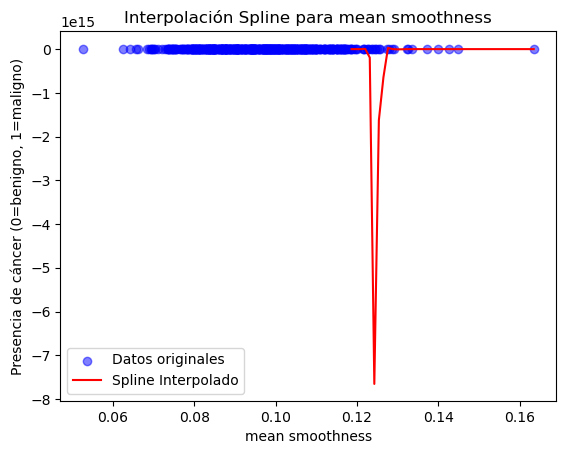

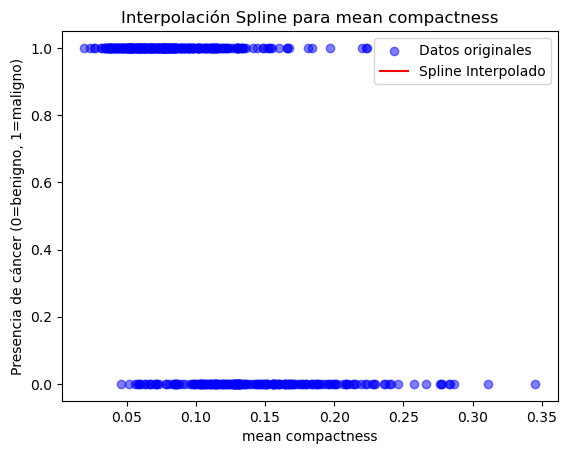

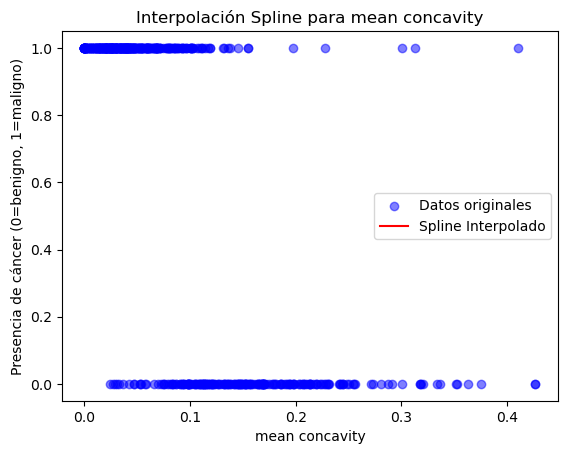

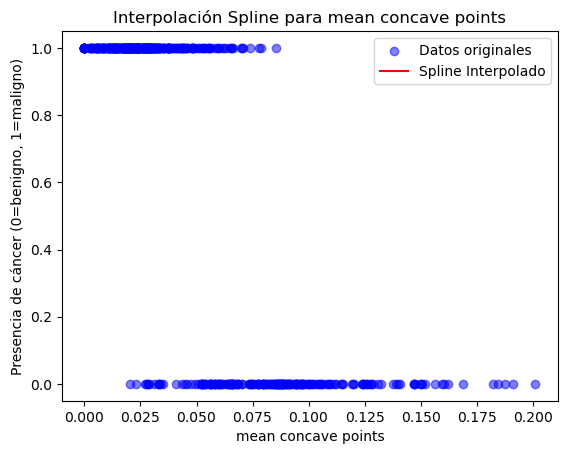

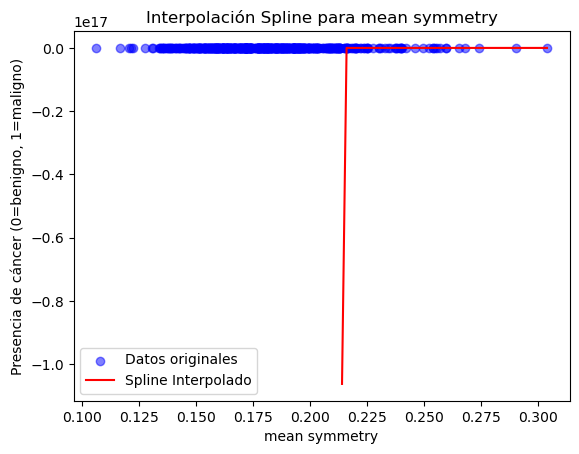

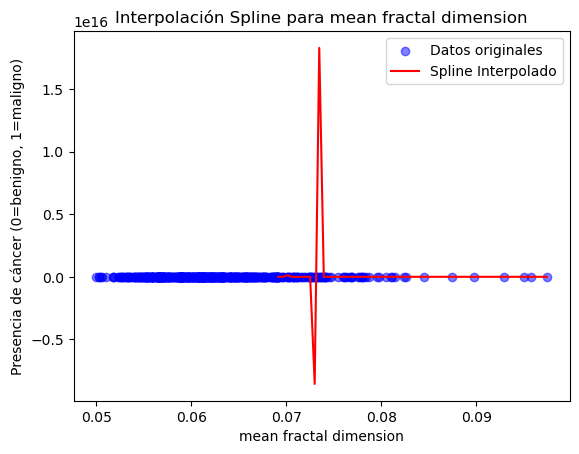

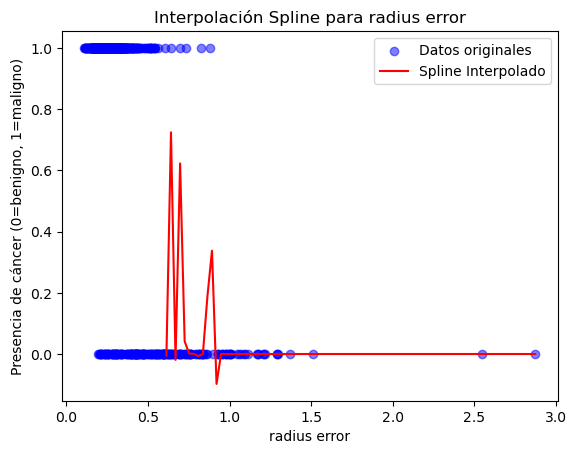

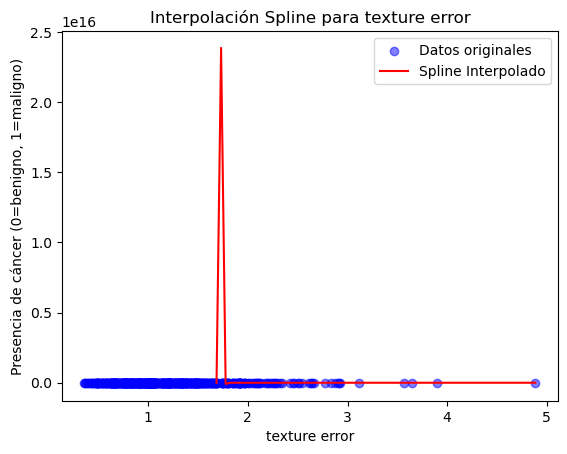

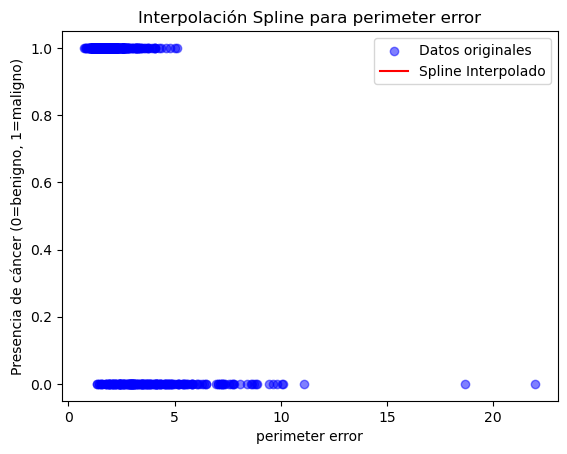

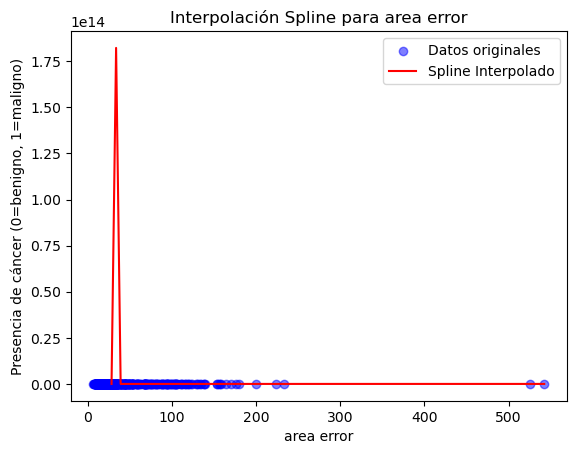

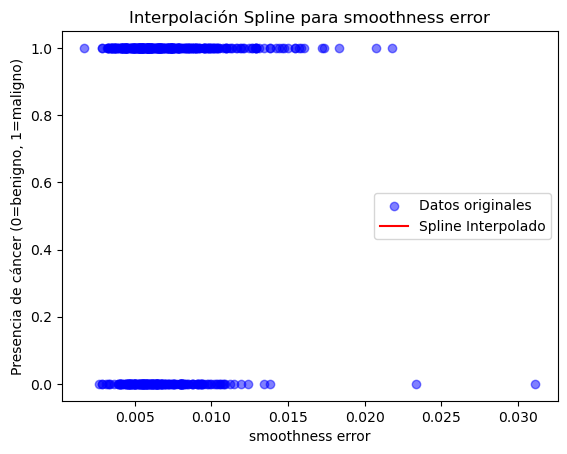

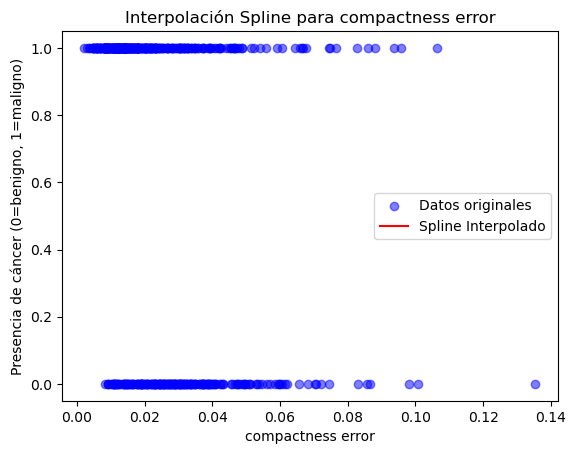

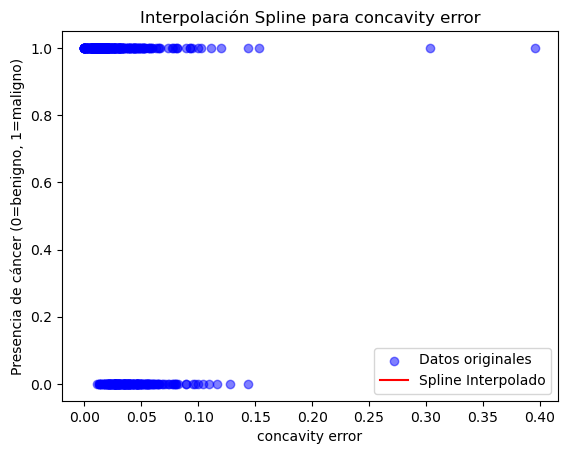

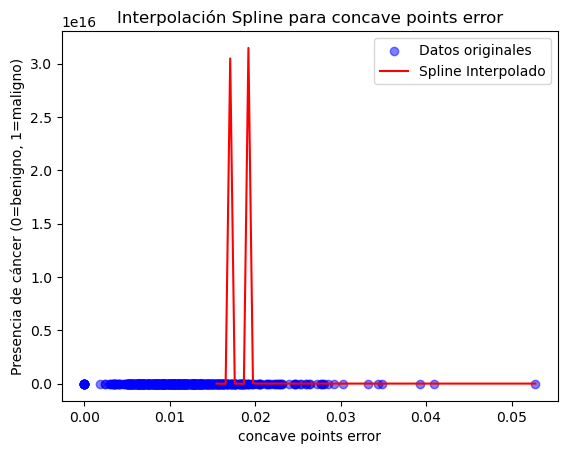

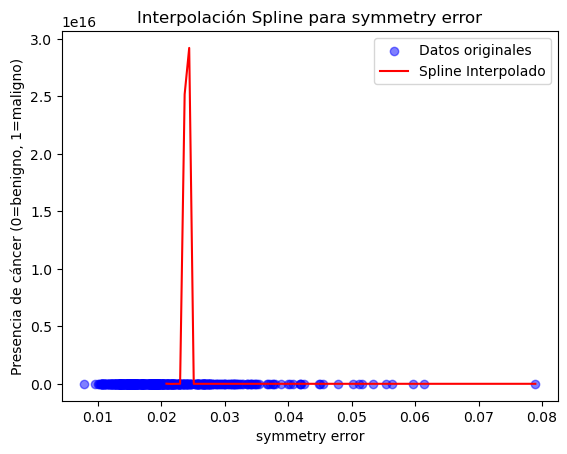

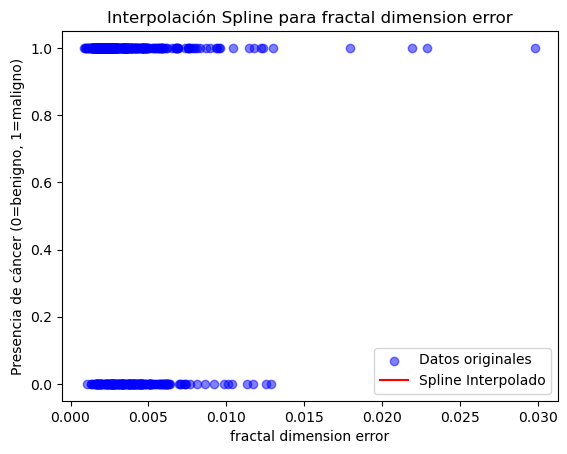

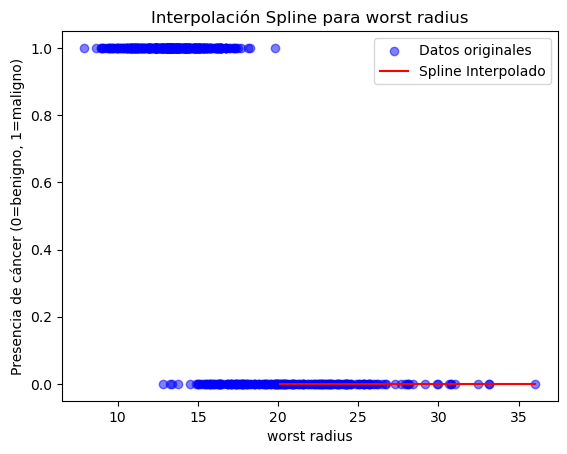

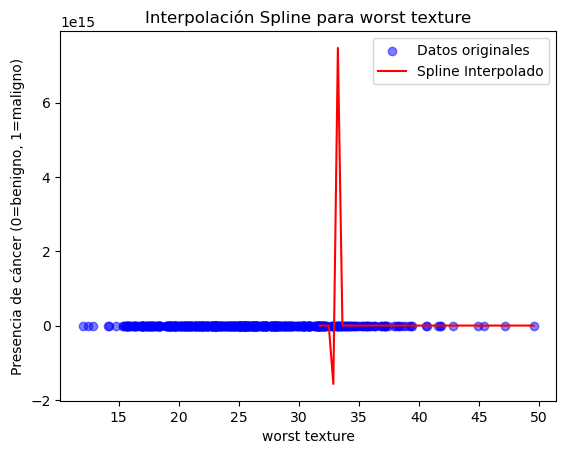

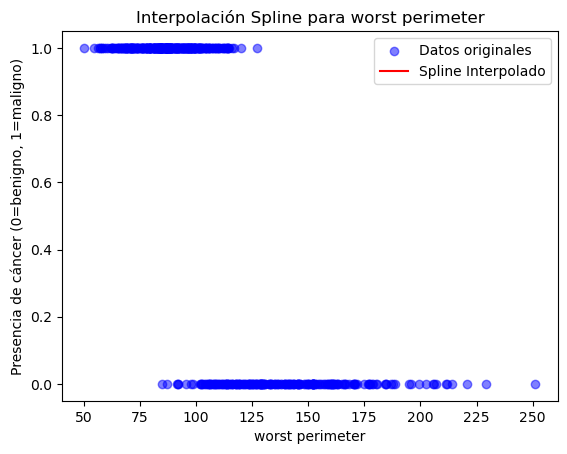

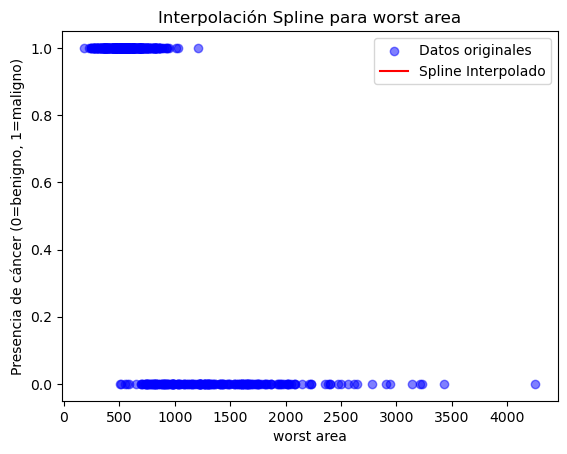

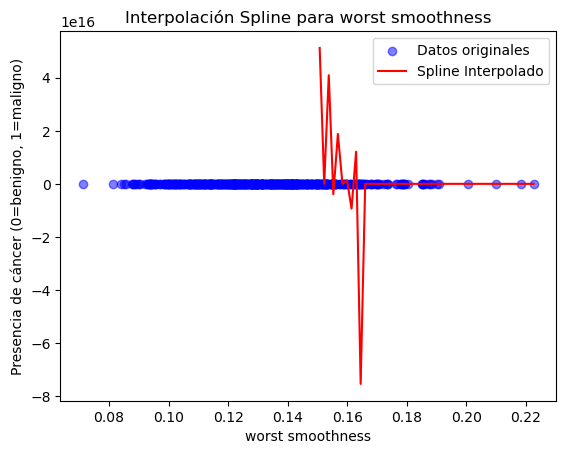

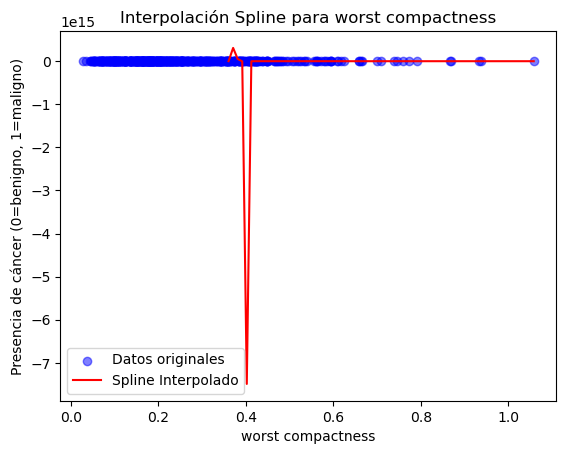

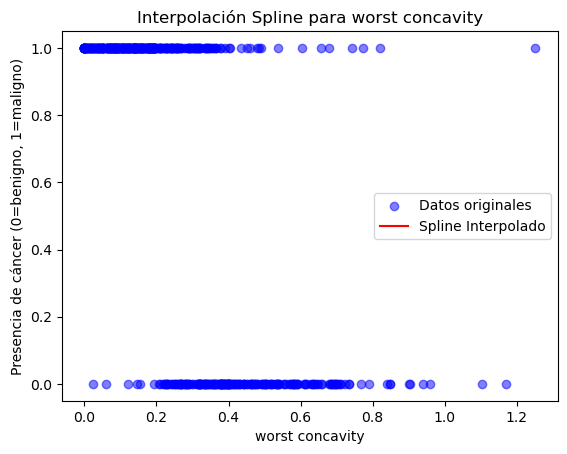

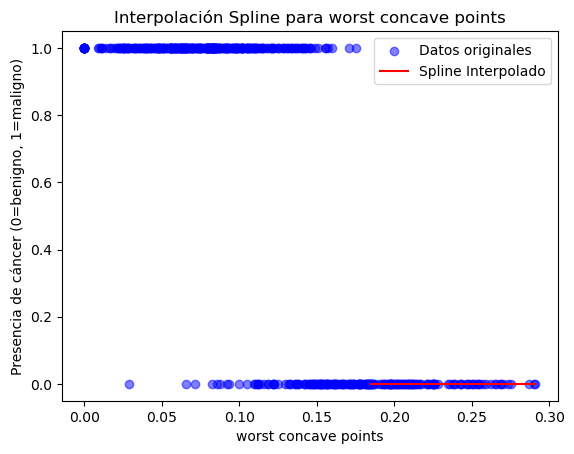

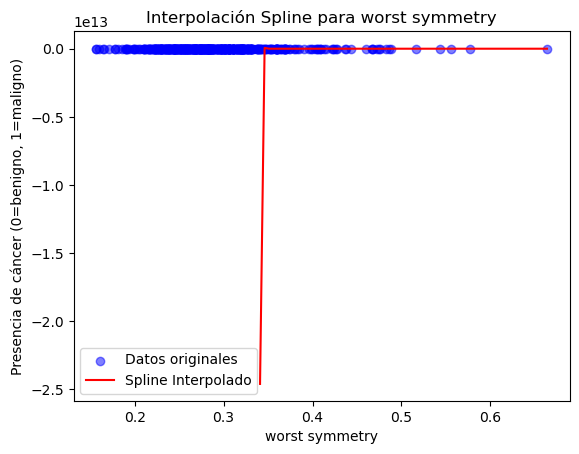

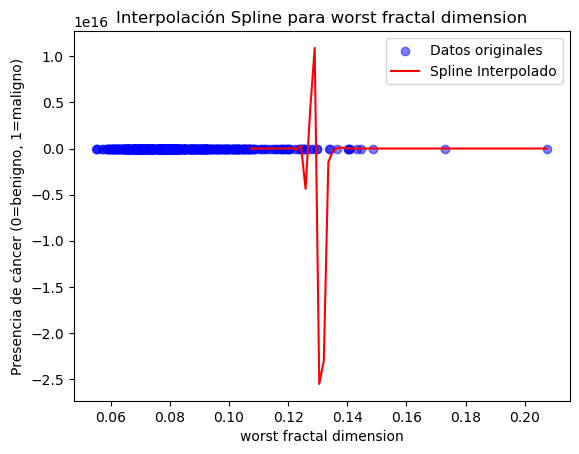

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from scipy.interpolate import UnivariateSpline

# Cargar el conjunto de datos de cáncer de mama como ejemplo
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Iterar sobre cada columna de X
for x_col in X.columns:
    # Obtener los valores de x y y
    x_values = X[x_col].values.flatten()
    y_values = y.values

    # Ordenar x y y juntos
    sorted_indices = np.argsort(x_values)
    x_sorted = x_values[sorted_indices]
    y_sorted = y_values[sorted_indices]

    # Ajustar un spline a los datos
    spline = UnivariateSpline(x_sorted, y_sorted, s=1)  # s es el parámetro de suavizado

    # Crear un conjunto de puntos para graficar la spline dentro del rango de X
    x_smooth = np.linspace(x_sorted.min(), x_sorted.max(), 100)
    y_smooth = spline(x_smooth)

    # Graficar los datos originales y la interpolación spline
    plt.scatter(x_sorted, y_sorted, color='blue', label='Datos originales', alpha=0.5)
    plt.plot(x_smooth, y_smooth, color='red', label='Spline Interpolado')
    plt.xlabel(x_col)  # Usar el nombre de la columna como etiqueta
    plt.ylabel('Presencia de cáncer (0=benigno, 1=maligno)')
    plt.legend()
    plt.title(f'Interpolación Spline para {x_col}')
    plt.show()